In [ ]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# %matplotlib inline используется для визуализации статических графиков matplotlib
# Замените inline на notebook, чтобы получить масштабируемые и изменяемые диаграммы. 
#Только убедитесь, что команда добавлена перед импортом matplotlib.


In [ ]:
import tensorflow as tf

from tensorflow                 import keras
from tensorflow.keras.datasets  import fashion_mnist

from tensorflow.keras.models    import Sequential # это модель нейронной сети где слои идут друг за другом
from tensorflow.keras.layers    import Dense, Dropout

from tensorflow.keras           import utils
from keras.utils.vis_utils      import plot_model




In [ ]:
#делим наш датасет на обучающую и тестовую выборку



(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boat']



4431872/4422102 [==============================] - 0s 0us/step


AttributeError: ignored

['a', 'b', 'c', 'D']

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boat']

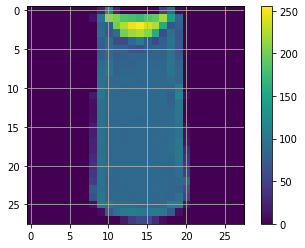

In [ ]:


# Предварительая обработка данных

# Посмотрим как выглядят изображения

plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.grid(True)

 

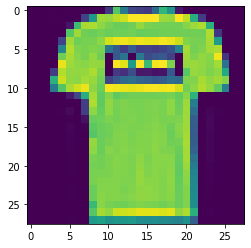

In [ ]:
plt.imshow(x_train[1])
#plt.colorbar()

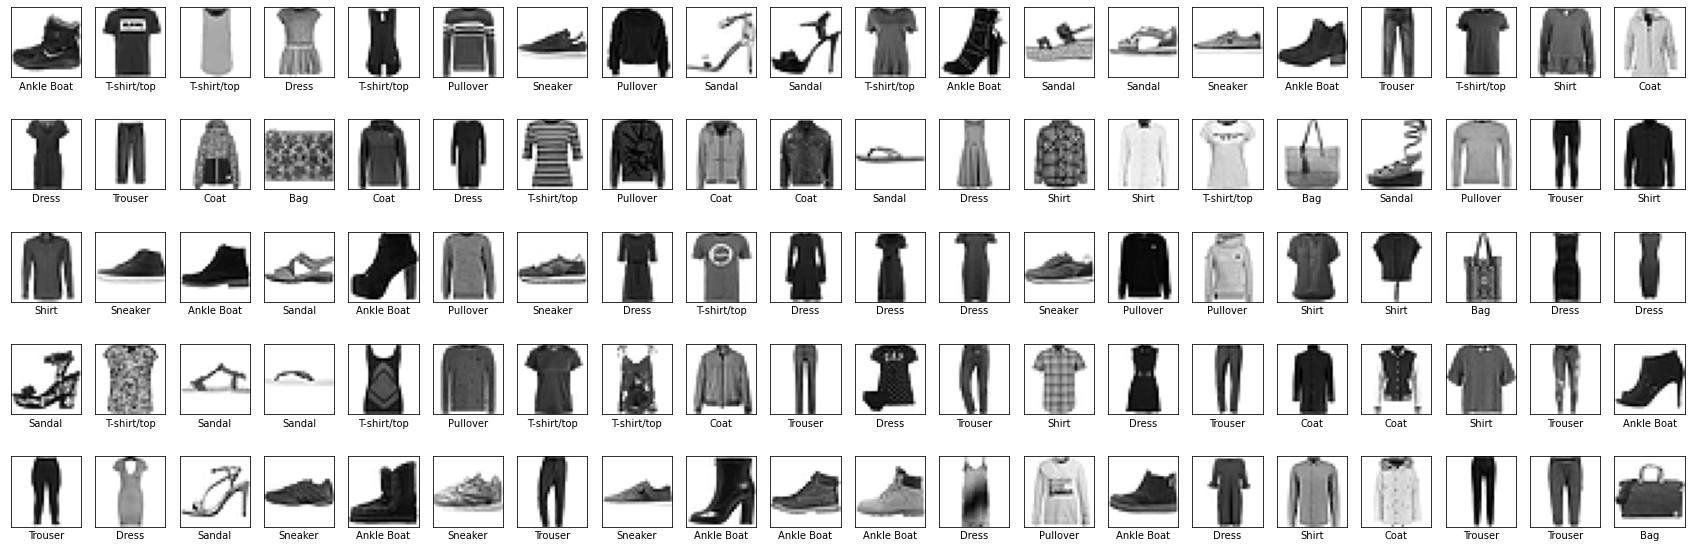

In [ ]:

# x_train = x_train/255
# x_test = x_test/255


# plt.figure()
# plt.imshow(x_train[1])
# plt.colorbar()
# plt.grid(False)


# Построим несколько изображений

plt.figure(figsize = (30, 10))
for i in range(100):
  plt.subplot(5,20,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])








In [ ]:
# Создание модели нейронной сети

l0 = tf.keras.layers.Flatten(input_shape=(28,28))
l1 =    keras.layers.Dense( 10, activation = "sigmoid")

model = keras.Sequential([l0, l1])


#model = keras.Sequential([
 # keras.layers.Flatten(input_shape=(28,28)),
  #keras.layers.Dense(128, activation = "relu"),
  #keras.layers.Dense(128, activation = "atom"),
#   keras.layers.Dense( 10, activation = "sigmoid")
  #keras.layers.Dense( 10, activation = "softmax")
#])

# Компиляция модели
model.compile(optimizer = tf.keras.optimizers.SGD(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
# metrics=['accuracy'] - параметр качества. 'accuracy' - это доля правильных ответов



model.summary()

# Обучение модели
model.fit(x_train, y_train, epochs=5)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2059.0798 - accuracy: 0.7400
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1614.2495 - accuracy: 0.7782
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1535.4938 - accuracy: 0.7883
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1509.6260 - accuracy: 0.7905
Epoch 5/5
1875/1875 [=============

In [ ]:
# test_loss, test_acc = model.evaluate(x_test, y_test)
print("test accuracy:", np.round(test_acc,2), np.round(test_loss))

test accuracy: 0.76 1993.0


In [ ]:
#predictions
from keras.utils.vis_utils import plot_model
predictions = model.predict(x_train)

# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



# plt.figure(figsize=(8,8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Точность на обучении')

history = model.fit(x_train, y_train, epochs=5, validation_split=0.25,  batch_size=16, verbose=1)
history

# model.fit(x_train, y_train, epochs=5)

# Обучение и проверка точности значений

# plt.plot(history.history[])


Epoch 1/5
2813/2813 [==============================] - 7s 3ms/step - loss: 2222.0408 - accuracy: 0.7737 - val_loss: 1450.1292 - val_accuracy: 0.8018
Epoch 2/5
2813/2813 [==============================] - 7s 3ms/step - loss: 2122.6226 - accuracy: 0.7899 - val_loss: 3671.9497 - val_accuracy: 0.7098
Epoch 3/5
2813/2813 [==============================] - 7s 2ms/step - loss: 2089.1284 - accuracy: 0.7911 - val_loss: 1787.7483 - val_accuracy: 0.8016
Epoch 4/5
2813/2813 [==============================] - 7s 2ms/step - loss: 2129.0173 - accuracy: 0.7951 - val_loss: 1811.8903 - val_accuracy: 0.8081
Epoch 5/5
2813/2813 [==============================] - 7s 2ms/step - loss: 2107.6628 - accuracy: 0.7948 - val_loss: 2123.2100 - val_accuracy: 0.7929


In [ ]:
np.round(predictions[2],1)
#print(dense_1)

array([0.9, 0.9, 0.7, 0.9, 0.8, 0. , 0.8, 0.1, 0.1, 0.1], dtype=float32)

In [ ]:
np.argmax(predictions[2])

#print("Это значения переменных слоя: {}".format(keras.layers.Dense( 10, activation = "sigmoid").get_weights()))
#print("Это значения переменных слоя: {}".format(l0.get_weights()))
#print("Это значения переменных слоя: {}".format(l1.get_weights()))

print(l1.get_weights())

show_shapes(l1.get_weights())



[array([[-0.07856187, -0.07218874,  0.01123387, ...,  0.04540314,
         0.02669828, -0.07726489],
       [ 0.06202241,  0.06291936,  0.06571954, ...,  0.06070479,
        -0.04085476,  0.01077981],
       [ 0.01029008,  0.01287911, -0.01323108, ...,  0.08254614,
         0.00559904, -0.02810227],
       ...,
       [-0.06573409, -0.04794709, -0.04406169, ...,  0.00497833,
        -0.08211105, -0.04224129],
       [-0.03838148, -0.03678349, -0.02825336, ...,  0.00152745,
        -0.03342443,  0.01229822],
       [-0.07957272,  0.08267737, -0.00915315, ..., -0.04071838,
        -0.0876382 , -0.04455306]], dtype=float32), array([ 0.11705133, -0.11774115, -0.0578059 ,  0.03694385, -0.57586527,
        1.2649312 ,  0.2846086 , -0.10135966, -0.29771468, -0.5530473 ],
      dtype=float32)]


AttributeError: ignored

In [ ]:
y_train[2]

0

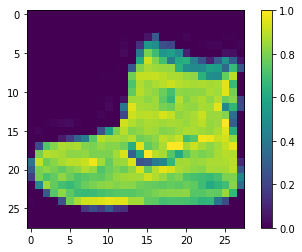

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)


In [ ]:
class_names[np.argmax(predictions[2])]

NameError: ignored

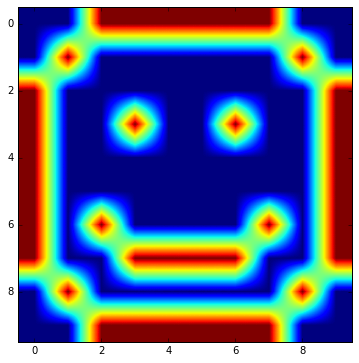

In [ ]:
%matplotlib inline 
# включает графики прямо в документ
import numpy as np
import matplotlib.pyplot as plt

#  Двумерный массив пикселей:
smile = [[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
         [1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
         [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0]]

fig, ax = plt.subplots()
ax.imshow(smile)


fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()



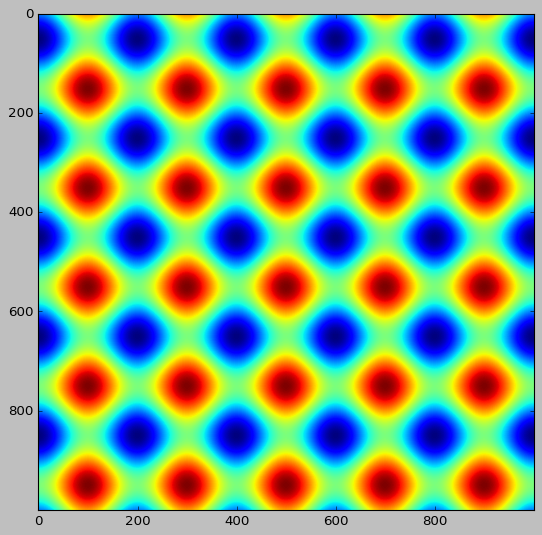

In [ ]:


import numpy as np
import matplotlib.pyplot as plt


x, y = np.mgrid[-5*np.pi:5*np.pi:1000j,
                -5*np.pi:5*np.pi:1000j]

z = np.sin(x) + np.cos(y)

fig, ax = plt.subplots()

ax.imshow(z)
#plt.style.use('classic')
#plt.style.context('dark_background')
fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

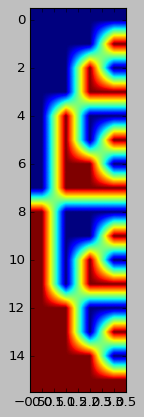

In [ ]:
# training_inputs
n=4
training_inputs = np.zeros((2**n, n))
k=int(0)
L=1
z=int(1)
for j in range (0, n):  #столбец
    for i in range ( 0, 2**n): #строка
        if L > 2**n/2**(j+1) :
              k = k + z
              z = z *(-1)
              L=1
        L=L+1
        training_inputs[i][j] = k


fig, ax = plt.subplots()
ax.imshow(training_inputs)

fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()